<a href="https://colab.research.google.com/github/pedd1-Srividya/DS-AI-ML-And-Web-Devolopment-Practice/blob/master/AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Artificial Intelligence**

**Artificial Intelligence:**

Smart Machine

Memics human actions

**Artificial:**

Man-Made

**Intelligence:**

Ability to learn, understand and solve problems

**AI:**

Predicting Future isn't magic, its Artificial Intelligence.-Dave Waters

science and Engineering of building intelligent machines.

**Working:**

Data--->Algorithm--->AI Machines

**Applications of AI:**

NLP(Natural Langugage process)-ChatGPT

Image and Video Analysis

Health care

Autonomous Vehicle(Self-Driving Car)

Recommendation System(NETFLIX)

Virtual Assistant

**AI Related Technologies:**

Artificial Intelligence-Engineering of making Intelligent Machines and Programs

Machine learning-Ability to learn without being explicitly programmed

Deep Learning-Learning based on Deep Neural Network

In [ ]:
# @title Computer Vision(CV)
'''
Uploading/Searching Google Lens
Face Recognition
Cameras
Self-Driving Cars
CCTV

AI Tools:
* OpenCV - Open-Source library.
* TensorFlow - For deep learning-based vision tasks.
* PyTorch - Research-heavy vision models
'''

'\n\n'

In [ ]:
# Installing OpenCV
!pip install --quiet opencv-python

In [5]:
# @title Recognising Face in Passport size photo
# Step-1: Install and Importing Important Libraries
# Import OpenCv library for CV operations
import cv2
# Importing matplotlib for displaying images in colab
import matplotlib.pyplot as plt
# Import numpy for array operations (Images are numpy arrays)
import numpy as np
# Import files utility to upload images from your local machine into colab
from google.colab import files
# Import google drive
from google.colab import drive

In [4]:
# Step 2: Uploading the images
uploaded=files.upload()
# Get the first uploaded filename
# next(iter(uploaded))returns the first key in the uploaded dict the file name and increases the file versions of it as user upload the same file
filename=next(iter(uploaded))
# Print filename so we know which file was uploaded recently or succesfully

print('Uploaded file',filename)

Saving passportsize.jpg to passportsize (1).jpg
Uploaded file passportsize (1).jpg


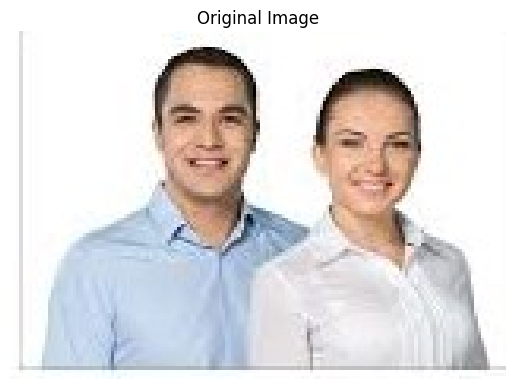

In [9]:
# Step 3: Display the image
# read the uploaded image from the disk into numpy array using OpenCV
img=cv2.imread(filename)
# Convert RGB for correct color display in matplotlib
image_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
# Display image using matplotlib(cv2.imshow() won't work in colab)
plt.imshow(image_rgb)
plt.axis('off')
plt.title('Original Image')
plt.show()

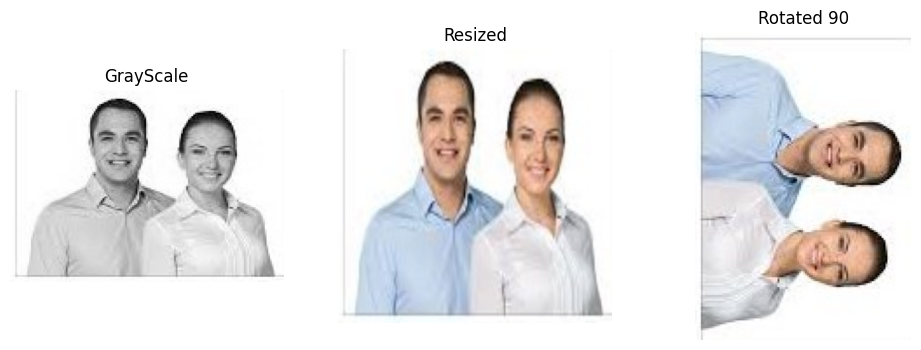

In [17]:
# Step 4: Image Transformation
'''
Transformations are used to prepare images before analysis or model training.

Transformations                   Purpose
Grayscale                         Removes color, keeps intensity - simpler to process.
Resize                            Ensures uniform input dimensions for models
Rotate                            Change orientation for augmentation.

Real-World Application
In passport photo verification system, images are resized and converted to grayscale befor face recognising.
'''
# Convert to Grayscale (reduce image into single intensity channel)
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# Resize the image to 300x300 pixels
resized=cv2.resize(img,(300,300))
# Rotate the image by 90 degrees clock wise
rotated=cv2.rotate(img,cv2.ROTATE_90_CLOCKWISE)
# Plot all images together
plt.figure(figsize=(12,4))
# GrayScale
plt.subplot(1,3,1)
plt.imshow(gray,cmap='gray')
plt.title('GrayScale')
plt.axis('off')

# Resized
plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(resized,cv2.COLOR_BGR2RGB))
plt.title('Resized')
plt.axis('off')

# Rotated
plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(rotated,cv2.COLOR_BGR2RGB))
plt.title('Rotated 90')
plt.axis('off')

plt.show()

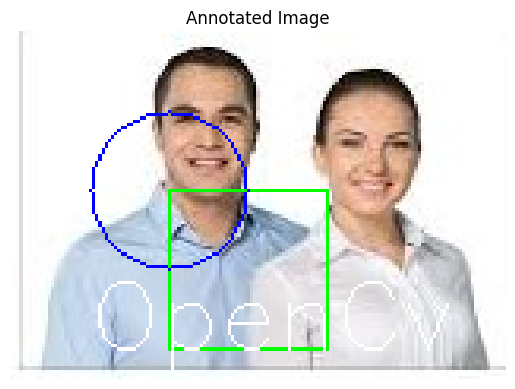

In [40]:
# Step 5: Drawing Shapes and Adding Text
'''
OpenCV allows you to draw lines, rectangles, circles and text - useful for making or annotating images.
Real-World application

Used in:
* Highlighting detected faces.
* Annotating objects in surveillance feeds.
* Drawing bounding boxes during model training.
'''
# Make a copy of the image so the original remains unchanged
img_copy=img.copy()
# Draw a green rectangle to the images
cv2.rectangle(img_copy,(50,50),(100,100),(0,255,0),1)
# Draw a blue circle
cv2.circle(img_copy,(50,50),25,(255,0,0),1)
# Write text on image
cv2.putText(img_copy,'OpenCv Demo',(25,100),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),1)
# Convert BGR to RGB for Display
img_rgb=cv2.cvtColor(img_copy,cv2.COLOR_BGR2RGB)
# Display the image
plt.imshow(img_rgb)
plt.title('Annotated Image')
plt.axis('off')
plt.show()

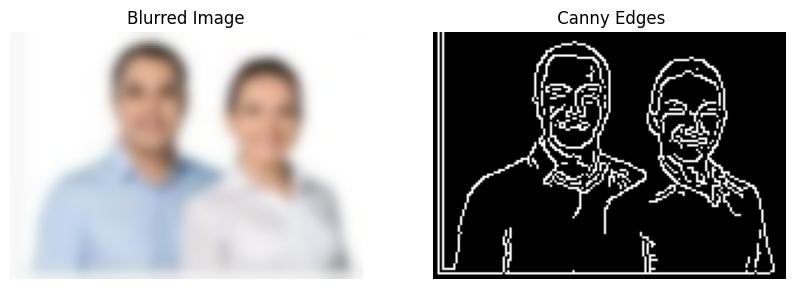

In [45]:
# Step 6: Image filtering (Blurring and Edge detection)
'''
Filtering helps reduce noise and extract useful features.

Gaussian Blur             Smoothens the image, reduces noise.
Canny Edge Detection      Detects objects boundaries
'''
# Apply Gaussian Blur to reduce noise
blurred=cv2.GaussianBlur(img,(15,15),0)

# Convert Image to Grayscale for edge detection
gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# Detect the edges using canny edge detection
edges=cv2.Canny(gray_img,100,200)

# Display Blurred and Edge Images
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(blurred,cv2.COLOR_BGR2RGB))
plt.title('Blurred Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(edges,cmap='gray')
plt.title(' Canny Edges')
plt.axis('off')

plt.show()

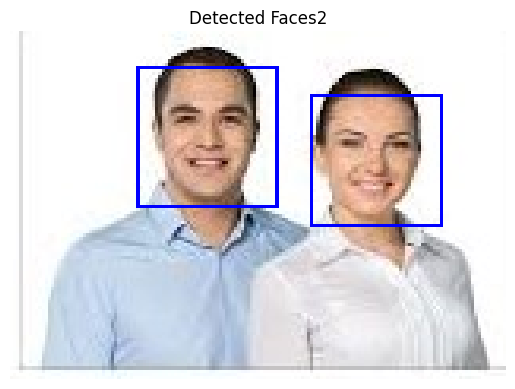

In [54]:
# Step 7: Face detection using Haar Cascade
'''
Face detection locates faces withing an image using pre-trained models.
The Haar Cascade Classifier is one of OpenCV's model methods for detecting faces.
'''
# Load the pre-trained Haar Cascade Classifier for face detection
face_cascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

# Convert image into grayscale (as detector works better on grayscale)
gray_face=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# Detect the faces (returns x,y , width and height for each detected faces)
faces=face_cascade.detectMultiScale(gray_face, scaleFactor=1.1,minNeighbors=5,minSize=(30,30))

# Draw rectangles around detected faces
img_faces=img.copy()
for (x,y,w,h) in faces:
  cv2.rectangle(img_faces,(x,y),(x+w,y+h),(255,0,0),1)
# Convert to rGB for display
img_faces_rgb=cv2.cvtColor(img_faces,cv2.COLOR_BGR2RGB)

# Show detected faces
plt.imshow(img_faces_rgb)
plt.title(f'Detected Faces{len(faces)}')
plt.axis('off')
plt.show()

# NLP(Natural Language Processing)

In [ ]:
# @title Definition
'''
NLP is a subfeild of AI that focuses on enabling computer to understand, interpret and generate human language.

Why NLP is important?
Humans communicate using text and speech - and NLP allows machine to:
* understand human qureies
* respond intelligently
* Analyze text data from emails, reveiws and documents.

Real-World Applications
ChatGPT & Virtual Assistants
Sentiment Analysis
News catgorization
Spam Detection
Language Translation
'''

In [2]:
# @title Step 1: Install and Import Required Libraries
# Install NLP libraries
!pip install nltk textblob
# Import NLTK (Natural Language Tool Kit) for text preprocessing
import nltk
# Import TextBlob for simple sentiment analysis and NLP Tasks
from textblob import TextBlob
# Download essential NLTK data (Tokenizers,stopwords)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [4]:
# @title Step 2
'''
Let's define some example of movie reviews.
'''
review1 = 'Must watch movie it was a great family entertainer.'
review2 = 'It was okay, and the story was fine and little boring.'
review3 = 'The film was awful and a complete waste of time.'

In [5]:
# @title Step 3: Sentiment Analysis with TextBlob
# Analyze each review using TextBlob
for review in [review1, review2, review3]:
  blob=TextBlob(review)
  sentiment=blob.sentiment.polarity # Polarity will give values from -1 to +1

  # Interpret sentiment
  if sentiment>0.3:
    label='Positive'
  elif sentiment<-0.3:
    label='Negative'
  else:
    label='Neutral'
  # Print Result
  print(f'Review:{review}')
  print(f'Sentiment score:{sentiment}➡️{label}')

Review:Must watch movie it was a great family entertainer.
Sentiment score:0.8➡️Positive
Review:It was okay, and the story was fine and little boring.
Sentiment score:-0.06770833333333331➡️Neutral
Review:The film was awful and a complete waste of time.
Sentiment score:-0.3666666666666667➡️Negative


In [8]:
# @title Step 4: Tokenization and Stopword Removal
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# Sample text for processing
text='Natural language Processing makes the machine understand human language.'
# Tokenize (split text into words)
tokens=word_tokenize(text)
print("Tokens:",tokens)
# Load stopwords (common words that add little meaning)
stop_words=set(stopwords.words('english'))
# Remove Stopwords
filtered_words=[word for word in tokens if word.lower() not in stop_words]# Filtering all the words which has little meaning
print("After Stopword Removal",filtered_words)

Tokens: ['Natural', 'language', 'Processing', 'makes', 'the', 'machine', 'understand', 'human', 'language', '.']
After Stopword Removal ['Natural', 'language', 'Processing', 'makes', 'machine', 'understand', 'human', 'language', '.']
